Data source:
John Hopkins University Centre for System Sciences and Engineering

https://github.com/CSSEGISandData/COVID-19/

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
import folium

Importing data:
(Data source: John Hopkins University Centre for System Sciences and Engineering at https://github.com/CSSEGISandData/COVID-19/)

In [88]:
datanow = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-20-2020.csv')

In [89]:
data= pd.read_csv("covid_19_data.csv")
# Source: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv

In [90]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [91]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,7313.000000,7313.000000,7313.000000,7313.000000
mean,3657.000000,623.016409,21.145494,231.619171
std,2111.225592,4914.340881,213.643556,2634.378848
min,1.000000,0.000000,0.000000,0.000000
25%,1829.000000,2.000000,0.000000,0.000000
50%,3657.000000,15.000000,0.000000,0.000000
75%,5485.000000,120.000000,1.000000,10.000000
max,7313.000000,67800.000000,4032.000000,58382.000000


###Data cleaning:

Adding a column for active cases to both dataframes':

In [92]:
data['Active'] = data['Confirmed'] - data['Deaths'] - data['Recovered']

In [93]:
datanow['Active'] = datanow['Confirmed'] - datanow['Deaths'] - datanow['Recovered']

In [94]:
data['Country/Region'].replace({'Mainland China':'China'},inplace=True)
countries = data['Country/Region'].unique().tolist()

In [95]:
datanow['Country/Region'].replace({'Mainland China':'China'},inplace=True)
countries = datanow['Country/Region'].unique().tolist()

###Condition at the moment

In [96]:
atm = datanow.groupby('Last Update')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
atm = atm[atm['Last Update']==max(atm['Last Update'])].reset_index(drop=True)
atm

,Last Update,Confirmed,Deaths,Recovered,Active
0,2020-03-20T23:43:03,6215,147,0,6068


###Number of cases over time

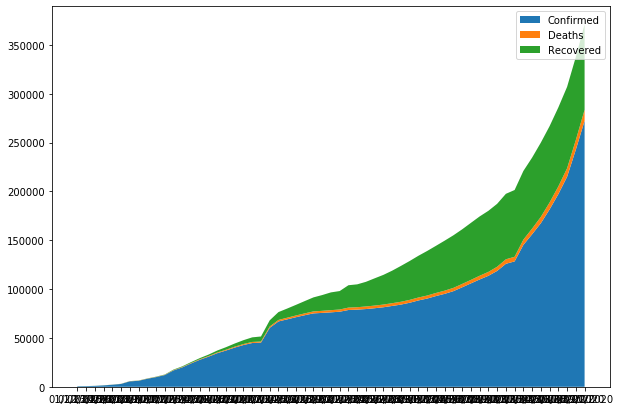

In [97]:
df = data.groupby('ObservationDate').agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum'}).reset_index()

x=df.ObservationDate.values
y=[df.Confirmed.values, df.Deaths.values, df.Recovered.values]
plt.figure(figsize = (10, 7))
plt.stackplot(x,y, labels=['Confirmed','Deaths','Recovered'])
plt.legend()
plt.show()

###The top 10 countries with the most cases at the moment:

In [98]:
top20data = datanow.sort_values(by = 'Confirmed', ascending = False)
top20data = top20data[0:20]
t = top20data.drop(['Latitude', 'Longitude', 'Active'], axis = 1)
t.head(10).style.background_gradient(cmap='viridis')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,China,2020-03-20T07:43:02,67800,3133,58382
1,nan,Italy,2020-03-20T17:43:03,47021,4032,4440
2,nan,Spain,2020-03-20T17:43:03,20410,1043,1588
3,nan,Germany,2020-03-20T20:13:15,19848,67,180
4,nan,Iran,2020-03-20T15:13:21,19644,1433,6745
5,France,France,2020-03-20T22:43:03,12612,450,12
6,nan,"Korea, South",2020-03-20T02:13:46,8652,94,1540
7,New York,US,2020-03-20T22:14:43,8310,42,0
8,nan,Switzerland,2020-03-20T18:13:09,5294,54,15
9,United Kingdom,United Kingdom,2020-03-20T20:13:18,3983,177,65


###List of all countries that have been affected

In [99]:
affected_countries = list(data['Country/Region'].unique())
print(affected_countries)

['China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Saint Barthelemy', 'Hungary'

###Total number of countries that have been affected

In [100]:
number_of_affected_countries = len(affected_countries)
number_of_affected_countries

191

###Number of cases by country

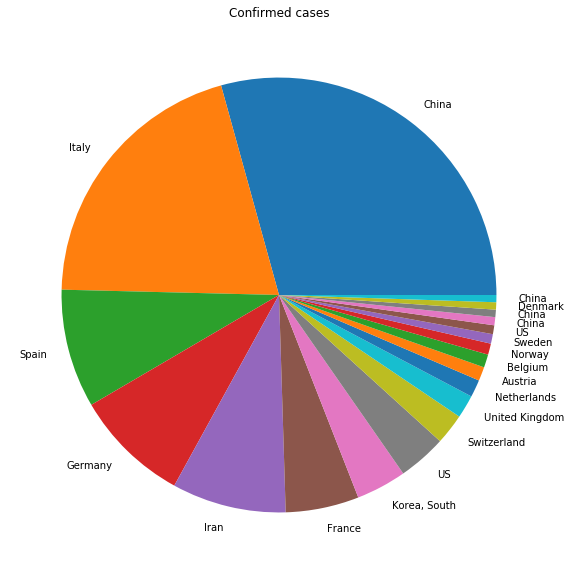

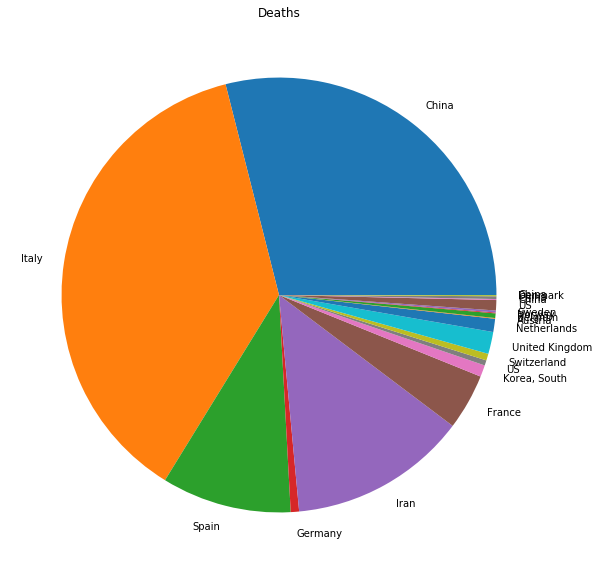

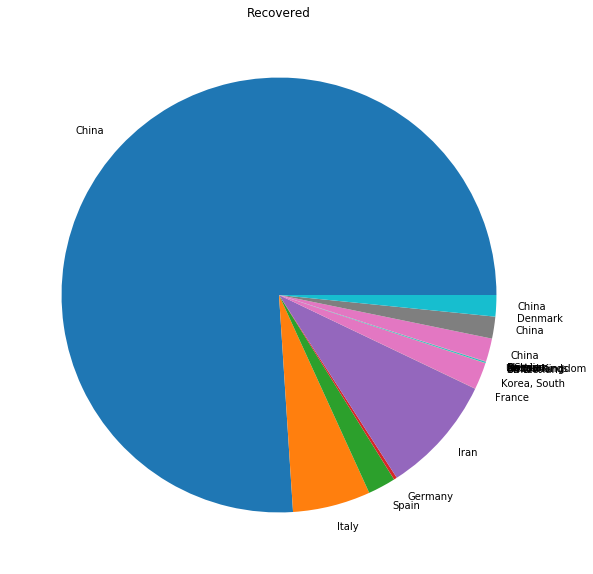

In [101]:
p1 = plt.figure(figsize=(10, 10))
p1 = plt.pie(top20data['Confirmed'], labels=top20data['Country/Region'])
p1 = plt.title('Confirmed cases')

p2 = plt.figure(figsize=(10, 10))
p2 = plt.pie(top20data['Deaths'], labels=top20data['Country/Region'])
p2 = plt.title('Deaths')

p3 = plt.figure(figsize=(10, 10))
p3 = plt.pie(top20data['Recovered'], labels=top20data['Country/Region'])
p3 = plt.title('Recovered')
plt.show()

###World map

In [103]:
world_map = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=1, zoom_start=1)

for i in range(0, len(datanow)):
    folium.Circle(
        location=[datanow.iloc[i]['Latitude'], datanow.iloc[i]['Longitude']],
        color='black', 
        tooltip =   '<li><bold>Country : '+str(datanow.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(datanow.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(datanow.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(datanow.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(datanow.iloc[i]['Recovered']),
        radius=int(datanow.iloc[i]['Confirmed'])**1.1).add_to(world_map)

world_map

###Fatality rate by country

In [104]:
data['Fatality Rate'] = data['Deaths'] / data['Confirmed'] * 100
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active,Fatality Rate
0,1,01/22/2020,Anhui,China,1/22/2020 17:00,1.0,0.0,0.0,1.0,0.0
1,2,01/22/2020,Beijing,China,1/22/2020 17:00,14.0,0.0,0.0,14.0,0.0
2,3,01/22/2020,Chongqing,China,1/22/2020 17:00,6.0,0.0,0.0,6.0,0.0
3,4,01/22/2020,Fujian,China,1/22/2020 17:00,1.0,0.0,0.0,1.0,0.0
4,5,01/22/2020,Gansu,China,1/22/2020 17:00,0.0,0.0,0.0,0.0,NaN


###Confirmed cases vs deaths in the 20 countries with the most cases

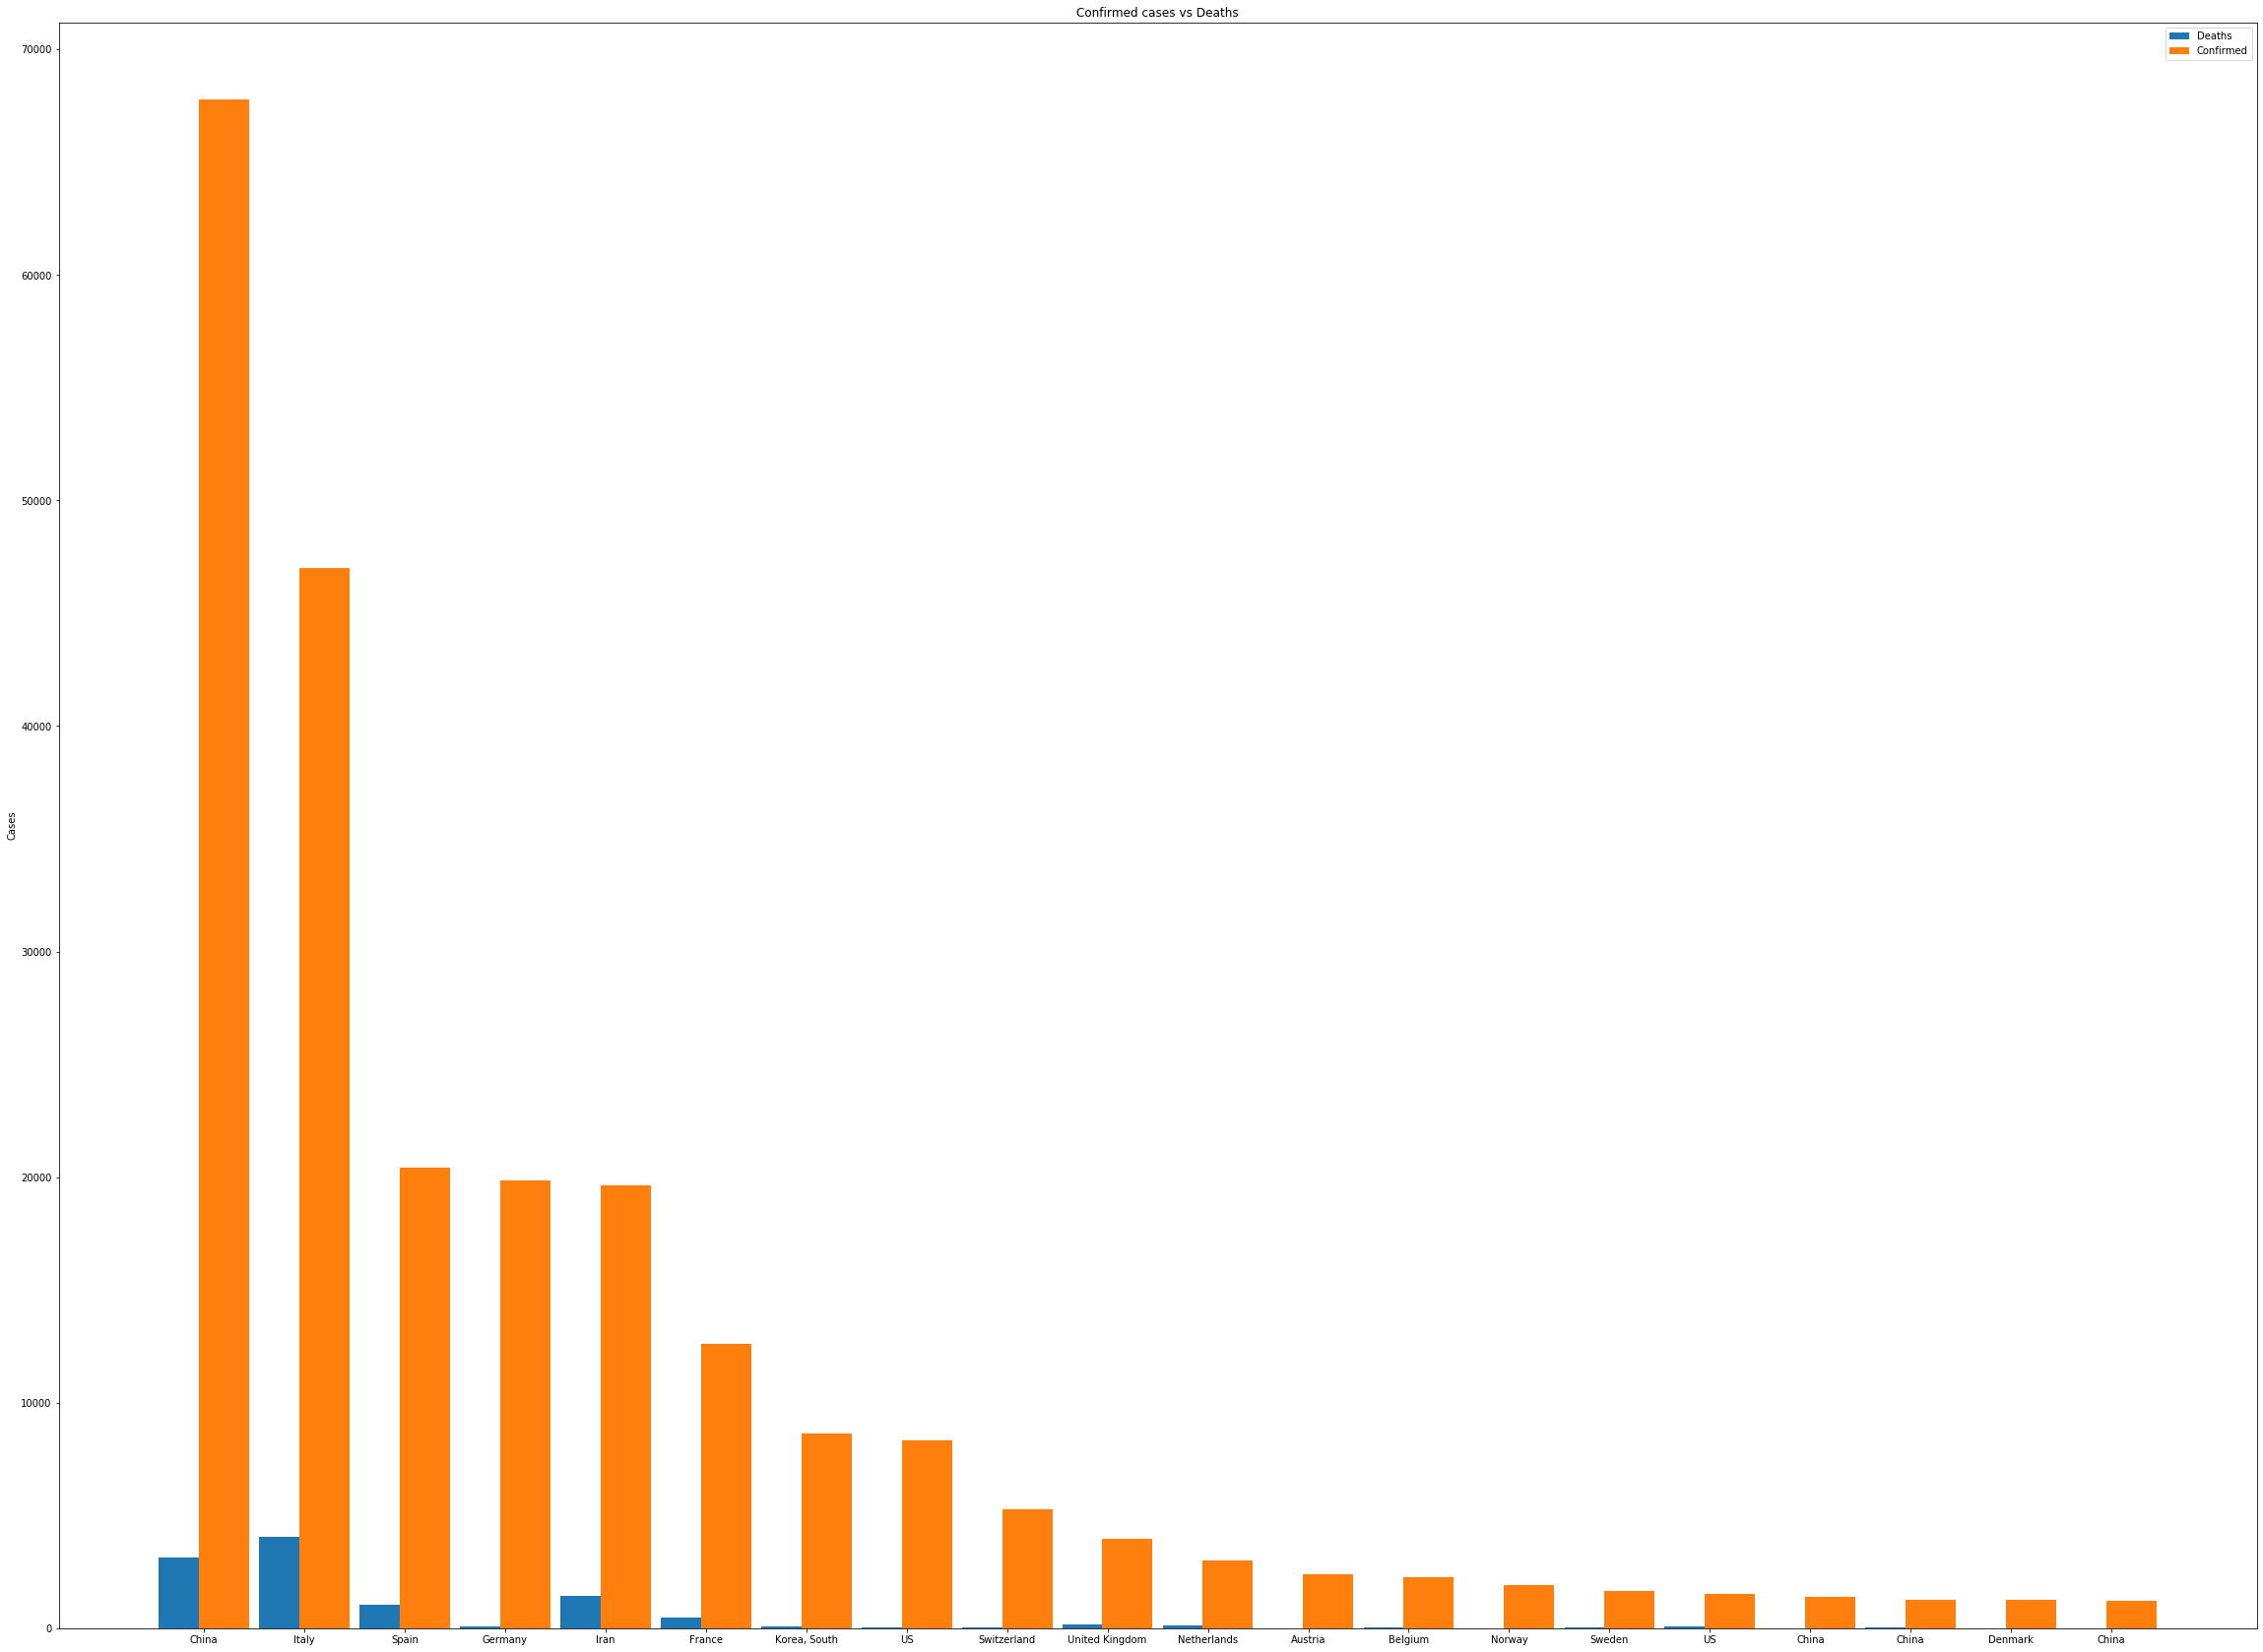

In [109]:
xpos = np.arange(len(top20data['Country/Region']))
plt.figure(figsize = (40, 30))
plt.bar(xpos-0.2, top20data['Deaths'], width=0.5, label="Deaths")
plt.bar(xpos+0.2,top20data['Confirmed'], width=0.5,label="Confirmed")
plt.xticks(xpos, top20data['Country/Region'])
plt.ylabel("Cases")
plt.title('Confirmed cases vs Deaths')
plt.legend()

###Fatality and survival rates

In [110]:
total_deaths = datanow['Deaths'].sum()
total_num_of_cases = datanow['Confirmed'].sum()
total_recoveries = datanow['Recovered'].sum()

print('Total number of deaths:', total_deaths)
print('Total number of cases:', total_num_of_cases)
print('Total number of recoveries:', total_recoveries)

Total number of deaths: 11299
Total number of cases: 272167
Total number of recoveries: 87403


In [111]:
fatality_rate = total_deaths/total_num_of_cases *100
print('Fatality rate:', fatality_rate, '%')

survival_rate = total_recoveries/total_num_of_cases *100
print('Survival rate:', survival_rate, '%')

Fatality rate: 4.151495221683746 %
Survival rate: 32.11373899113412 %
